### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv('titanic_dataset.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration and Preprocessing

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Checking missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Dropping unwanted columns
data.drop(['PassengerId','Name','Cabin','Ticket'],axis = 1, inplace = True)

In [7]:
#Checking missing values in Age feature
data[data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [8]:
#Checking missing values in Embarked feature
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [9]:
#Handling missing values

data['Age']= data['Age'].fillna(data['Age'].median())
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode())


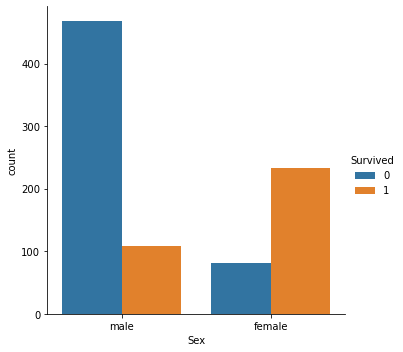

In [11]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

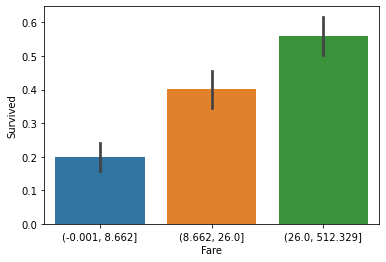

In [12]:
# Divide Fare into 3 bins
fare_range = pd.qcut(data['Fare'], 3)

sns.barplot(x = fare_range, y ='Survived', data =data)

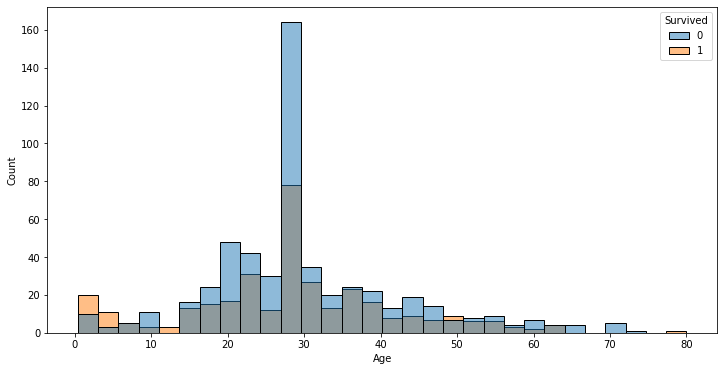

In [13]:
plt.figure(figsize = (12,6))
sns.histplot(x='Age', hue='Survived', data=data, bins=30)
plt.show()

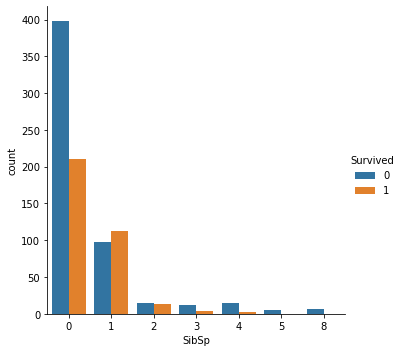

In [14]:
sns.catplot(x= 'SibSp', hue= 'Survived', kind= 'count',data= data)

In [15]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
#Encoding Categorical variables

data['Sex']= data['Sex'].map({'female':0, 'male':1})
data['Embarked']= data['Embarked'].map({'S':0, 'C':1, 'Q':3})

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [18]:
#Feature selection 
X= data[['Pclass','Sex','Age']]

In [19]:
#Target variable
y = data['Survived']

### Train-Test Split

In [20]:
#Splitting the dataset into training and testing sets to evaluate the model's performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

### Choose a  Model

In [21]:
#Selecting machine learning model - for binary classfication logistic regression is good starting point.
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

### Train the Model

In [22]:
#Training the model using training data.
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_predict = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
#Checking accuracy 

accuracy = accuracy_score(y_test,y_predict)
print(f' Accuracy is : {accuracy:.2f}')

 Accuracy is : 0.81


In [26]:
#Classfication report

report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Make Prediction

In [27]:
# Using trained model to make prediction on new data

new_data = pd.DataFrame({'Pclass':[2], 'Sex': [1], 'Age':[34]})
prediction =model.predict(new_data)
print(f'Predicted Survival : {prediction[0]}')

Predicted Survival : 0
